In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('crop_price_dataset.csv')
df.head()

,month,commodity_name,avg_modal_price,avg_min_price,avg_max_price,state_name,district_name,calculationType,change
0,2025-03-01,Maize,2341.58,2191.23,2402.98,India,All,Monthly,-14.43
1,2025-02-01,Maize,2356.01,2202.35,2414.46,India,All,Monthly,-26.19
2,2025-01-01,Maize,2382.20,2221.31,2448.22,India,All,Monthly,53.42
3,2024-12-01,Maize,2328.78,2164.86,2411.66,India,All,Monthly,55.32
4,2024-11-01,Maize,2273.46,2077.63,2377.78,India,All,Monthly,35.48


In [3]:
df = df.drop(columns=[
    'avg_min_price', 
    'avg_max_price', 
    'state_name', 
    'district_name', 
    'calculationType',
    'change'
])
df

,month,commodity_name,avg_modal_price
0,2025-03-01,Maize,2341.58
1,2025-02-01,Maize,2356.01
2,2025-01-01,Maize,2382.20
3,2024-12-01,Maize,2328.78
4,2024-11-01,Maize,2273.46
...,...,...,...
2805,2010-05-01,Coconut,3093.35
2806,2010-04-01,Coconut,3126.97
2807,2010-03-01,Coconut,2988.44
2808,2010-02-01,Coconut,15745.70


In [4]:
df = df.drop(df.index[2808])
df

,month,commodity_name,avg_modal_price
0,2025-03-01,Maize,2341.58
1,2025-02-01,Maize,2356.01
2,2025-01-01,Maize,2382.20
3,2024-12-01,Maize,2328.78
4,2024-11-01,Maize,2273.46
...,...,...,...
2804,2010-06-01,Coconut,3073.12
2805,2010-05-01,Coconut,3093.35
2806,2010-04-01,Coconut,3126.97
2807,2010-03-01,Coconut,2988.44


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2809 entries, 0 to 2809
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   month            2809 non-null   object 
 1   commodity_name   2809 non-null   object 
 2   avg_modal_price  2809 non-null   float64
dtypes: float64(1), object(2)
memory usage: 87.8+ KB


In [6]:
df.isnull().sum()

month              0
commodity_name     0
avg_modal_price    0
dtype: int64

In [7]:
# Convert to datetime
df['month'] = pd.to_datetime(df['month'])

# Extract year and month number as numeric features
df['year'] = df['month'].dt.year
df['month_num'] = df['month'].dt.month

# Optional: drop the original 'month' column
df = df.drop(columns=['month'])

In [8]:
df = pd.get_dummies(df, columns=['commodity_name'], drop_first=True) #one - hot encoding 
df

,avg_modal_price,year,month_num,commodity_name_Coconut,commodity_name_Coffee,commodity_name_Cotton,commodity_name_Ginger(Dry),commodity_name_Groundnut,commodity_name_Jowar(Sorghum),commodity_name_Maize,commodity_name_Millets,commodity_name_Rice,commodity_name_Sugar,commodity_name_Sugarcane,commodity_name_Sunflower,commodity_name_Tea,commodity_name_Turmeric,commodity_name_Wheat
0,2341.58,2025,3,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
1,2356.01,2025,2,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
2,2382.20,2025,1,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
3,2328.78,2024,12,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
4,2273.46,2024,11,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2804,3073.12,2010,6,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2805,3093.35,2010,5,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2806,3126.97,2010,4,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2807,2988.44,2010,3,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False


### Model Training

In [9]:
# Features
X = df.drop(columns=['avg_modal_price'])

# Target
y = df['avg_modal_price']

In [10]:
from sklearn.model_selection import train_test_split

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize model
rf = RandomForestRegressor(n_estimators=200, random_state=42)

# Train
rf.fit(X_train, y_train)

# Predict
y_pred_rf = rf.predict(X_test)

# Evaluate
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest R² Score: {r2_rf:.4f}")
print(f"Random Forest RMSE: {np.sqrt(mse_rf):.2f}")

Random Forest R² Score: 0.8837
Random Forest RMSE: 1856.98


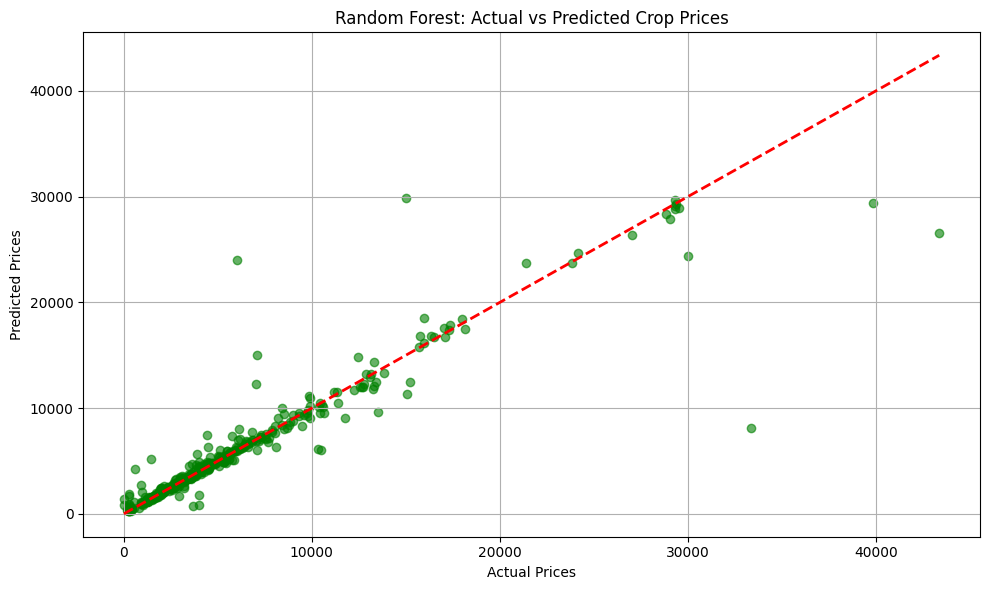

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, color='green', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Random Forest: Actual vs Predicted Crop Prices')
plt.grid(True)
plt.tight_layout()
plt.show()

In [13]:
import joblib

# Save the model
joblib.dump(rf, 'price_prediction_model.pkl')

# To load it later:
# loaded_model = joblib.load('random_forest_crop_model.pkl')

['price_prediction_model.pkl']